# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [30]:
# Your code here:
fifa.head(4)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
fifa['Value'].unique() #no todos están en millones, algunos están en miles!
#no podemos nada más quitarle los caracteres que no sean números

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [5]:
#hay varias maneras de hacerlo

In [6]:
fifa['ValueNumeric'] = fifa.Value.apply(lambda x: x[1:-1] if x[-1] != "K" else "."+ x[1:-1])
fifa['ValueNumeric'].unique()[:10] #y los miles ya están arreglados

array(['110.5', '77', '118.5', '72', '102', '93', '67', '80', '51', '68'],
      dtype=object)

In [7]:
fifa['ValueNumeric'] = fifa['ValueNumeric'].dropna()
fifa['ValueNumeric'] = fifa['ValueNumeric'].apply(lambda x: 0 if x== '' else x)
fifa['ValueNumeric'] = fifa['ValueNumeric'].apply(lambda x: float(x) if "." in str(x) else float(int(x)))

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [8]:
x1 = fifa['Position']
x2 = fifa['Preferred Foot']
x3 = fifa['ValueNumeric']
print(len(x1), len(x2), len(x3))

18207 18207 18207


In [9]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula='x3 ~ C(x1)*C(x2)'
modelo=ols(formula=formula, data=fifa).fit()

In [10]:
modelo.f_pvalue

3.6359928127324903e-113

In [16]:
res=sm.stats.anova_lm(modelo, typ=2)
res

,sum_sq,df,F,PR(>F)
C(x1),16178.968776,26.0,20.607303,4.686176e-95
C(x2),225.495213,1.0,7.467599,6.288026e-03
C(x1):C(x2),5110.510010,26.0,6.509304,7.770920e-23
Residual,546344.918372,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

In [11]:
# Your conclusions here:

"""
Con un p-valor prácticamente igual a cero, podemos rechazar la hipótesis nula
de que las medias en las 3 variables son iguales.

"""

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [27]:
print(len(x3), len(x4)) #ANOVA no corre con columnas de tamaño desigual
print(len(fifa))

18207 17918
17918


In [32]:
# Your code here:
x4 = fifa.Nationality
x3 = fifa['ValueNumeric'][fifa.Nationality != 'Nan'] #así lo ajusté
formula='x3 ~ C(x4)'
modelo=ols(formula=formula, data=fifa).fit()

In [33]:
res=sm.stats.anova_lm(modelo, typ=2)
res

,sum_sq,df,F,PR(>F)
C(x4),31874.562873,162.0,6.535591,8.901493e-127
Residual,534521.353303,17755.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
"""
Similar a lo anterior, el p-value es muy bajo y podemos rechazar la hipótesis nula de que
las medias son iguales. 
"""

In [34]:
print(len(x3), len(x4)) #arreglado

17918 17918


# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [13]:
# Your code here:
fifa.isnull().sum()
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [14]:
fifa = fifa.dropna(axis=0)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [38]:
fifa.SprintSpeed = fifa.SprintSpeed.apply(lambda x: int(x))
fifa.Stamina = fifa.SprintSpeed.apply(lambda x: int(x))
fifa.dtypes #sí son floats o int64. Pero la regresión me corre un error

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed         int64
Stamina             int64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
ValueNumeric      float64
dtype: object

In [ ]:
import statsmodels.api as sm

In [50]:
# Your code here:
import warnings
warnings.simplefilter('ignore')

In [51]:
x=sm.add_constant(fifa[['SprintSpeed', 'Stamina']])
y=fifa.ValueNumeric
modelo=sm.OLS(y, x).fit()

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [52]:
# Your conclusions here:
predictions = modelo.predict(x) 

print_model = modelo.summary()
print(print_model)

"""
R-Squared es extremedamente baja. El modelo es bajo. No explica la variación
ni siquiera en 5%. 

Es cierto que el p-valor es prácticamente cero, pero de todas maneras 
no jala mucho el modelo.
"""


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     534.0
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          1.95e-116
Time:                        17:15:39   Log-Likelihood:                -56101.
No. Observations:               17918   AIC:                         1.122e+05
Df Residuals:                   17916   BIC:                         1.122e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.7471      0.187     -9.328      

'\nR-Squared es extremedamente baja. El modelo es bajo. No explica la variación\nni siquiera en 5%. \n\nEs cierto que el p-valor es prácticamente cero, pero de todas maneras \nno jala mucho el modelo.\n'

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [53]:
# Your code here:
x=sm.add_constant(fifa['Potential'])
y=fifa.ValueNumeric
modelo=sm.OLS(y, x).fit()

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [54]:
# Your conclusions here:
predictions = modelo.predict(x) 
print_model = modelo.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     8810.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:16:48   Log-Likelihood:                -52781.
No. Observations:               17918   AIC:                         1.056e+05
Df Residuals:                   17916   BIC:                         1.056e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.0026      0.401    -87.342      0.0

In [ ]:
"""
Esto va mejor. Al menos se explica un tercio de la varianza.
Pero el p-value sigue siendo bajo; al menos rechazamos Ho.

"""

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [58]:
x = fifa['Potential'].values
y=fifa.ValueNumeric.values

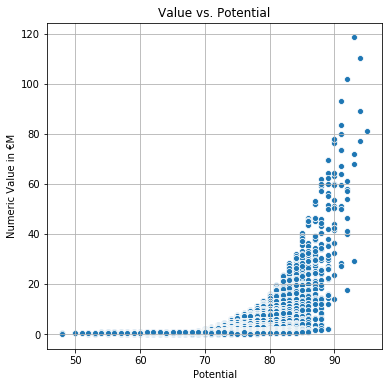

In [64]:
# Your code here:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax = sns.scatterplot(x,y)
plt.title("Value vs. Potential")
plt.xlabel("Potential")
plt.ylabel("Numeric Value in €M")
plt.grid()
plt.show();
